<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/653_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_MNIST_%EB%AC%B8%EC%9E%A5%EA%B0%90%EC%A0%95%EB%B6%84%EB%A5%98_CNN%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
from tensorflow import keras
from keras.datasets import mnist

In [4]:
print(dir(keras.datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'boston_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [5]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense

#MNIST 데이터셋 가지고 오기
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test / 255.0 #데이터 정규화
#MNIST의 픽셀값 범위가 0~255이기 때문에 모든 수를 1미만으로 정규화 시키기 위해 255.0을 나누어 준다.
#print(x_train.shape) #(60000, 28, 28)
#plt.imshow(x_train[7211])

#tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train)*0.7) #학습 세트 : 검증세트 = 7:3

#batch() > 처리하려고 들고오는 데이터의 수 (괄호안에 숫자만큼 가지고와서 데이터 처리)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

########################
#MNIST 분류 모델 구성###
########################

#Sequential() : 순차적인 신경망 구성할 때 사용되는 클래스
model = Sequential()
#MNIST 이미지의 크기가 28*28픽셀로 구성되어있는데, flatten을 이용해서 1차원으로 펼쳐준다.
model.add(Flatten(input_shape=(28,28))) #input layer// 인풋층
model.add(Dense(20, activation='relu')) #hidden layer// 히든층
model.add(Dense(20, activation='relu')) #hidden layer// 히든층
model.add(Dense(10, activation='softmax')) #output layer // 아웃풋층

#############
##모델 생성##(알고리즘 생성)
#############

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.complie(loss=categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#실제값과 예측값의 차이를 구하는 손실함수를 구할때 //  정해져있음 그냥 공식임// 가져다 쓰면됨
#optimizer => 경사하방법을 구하는 방법 중 하나 지정
#class(정답)가 3개 이상일때 ==> loss='sparse_categorical_crossentropy'
#class(정답)가 2개 이하일때 ==> loss=categorical_crossentropy'

#모델(알고리즘) 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

#모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

#모델 정보 출력
model.summary()

#모델 저장
model.save('mnist_model.h5')


Epoch 1/10
2100/2100 [==============================] - 15s 7ms/step - loss: 0.8335 - accuracy: 0.7545 - val_loss: 0.3748 - val_accuracy: 0.8920
Epoch 2/10
2100/2100 [==============================] - 7s 3ms/step - loss: 0.3452 - accuracy: 0.9006 - val_loss: 0.2990 - val_accuracy: 0.9142
Epoch 3/10
2100/2100 [==============================] - 7s 3ms/step - loss: 0.2917 - accuracy: 0.9161 - val_loss: 0.2664 - val_accuracy: 0.9232
Epoch 4/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2597 - accuracy: 0.9251 - val_loss: 0.2430 - val_accuracy: 0.9301
Epoch 5/10
2100/2100 [==============================] - 5s 3ms/step - loss: 0.2379 - accuracy: 0.9315 - val_loss: 0.2226 - val_accuracy: 0.9357
Epoch 6/10
2100/2100 [==============================] - 9s 4ms/step - loss: 0.2219 - accuracy: 0.9354 - val_loss: 0.2004 - val_accuracy: 0.9437
Epoch 7/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.2064 - accuracy: 0.9411 - val_loss: 0.1984 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


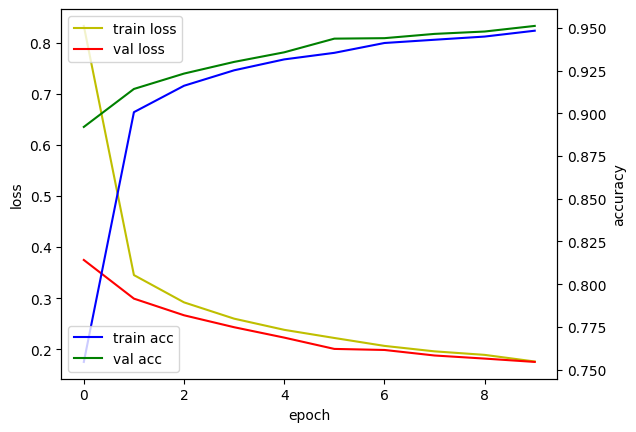

In [6]:
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 - 1s - loss: 0.1844 - accuracy: 0.9441 - 610ms/epoch - 2ms/step


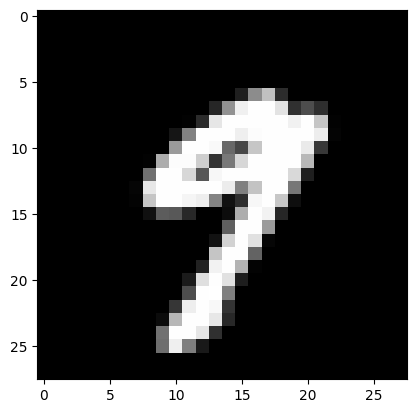

1/1 [==============================] - 0s 99ms/step
손글씨 이미지 예측값: [9]


In [7]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

#테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap='gray')
plt.show()

#테스트셋의 20번째 이미지 클래스 분류
picks=[20]
y_prob=model.predict(x_test[picks])
predicted = y_prob.argmax(axis=1)
print('손글씨 이미지 예측값:',predicted)

##문장 감정 분류 CNN 모델

In [9]:
# 필요한 모듈 임포트
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

# 데이터 읽어오기
train_file = "./dataset/chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

print(data.head())
print(data['label'].value_counts()) #0:일상다반사 // 1:이별(부정) //2.사랑(긍정)

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
0    5290
1    3570
2    2963
Name: label, dtype: int64


###CNN(Convolutional neural network, 합성곱 신경망)
 - 시각적 이미지 분석 및 분류에 일반적으로 사용되는 인공신경망이다.

In [10]:
# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
print(corpus)

[['12시', '땡'], ['1지망', '학교', '떨어졌어'], ['3박4일', '놀러가고', '싶다'], ['3박4일', '정도', '놀러가고', '싶다'], ['ppl', '심하네'], ['sd카드', '망가졌어'], ['sd카드', '안돼'], ['sns', '맞팔', '왜', '안하지ㅠㅠ'], ['sns', '시간낭비인', '거', '아는데', '매일', '하는', '중'], ['sns', '시간낭비인데', '자꾸', '보게됨'], ['sns보면', '나만', '빼고', '다', '행복해보여'], ['가끔', '궁금해'], ['가끔', '뭐하는지', '궁금해'], ['가끔은', '혼자인게', '좋다'], ['가난한', '자의', '설움'], ['가만', '있어도', '땀난다'], ['가상화폐', '쫄딱', '망함'], ['가스불', '켜고', '나갔어'], ['가스불', '켜놓고', '나온거', '같아'], ['가스비', '너무', '많이', '나왔다'], ['가스비', '비싼데', '감기', '걸리겠어'], ['가스비', '장난', '아님'], ['가장', '확실한', '건', '뭘까'], ['가족', '여행', '가기로', '했어'], ['가족', '여행', '고고'], ['가족', '여행', '어디로', '가지'], ['가족', '있어'], ['가족관계', '알려', '줘'], ['가족끼리', '여행간다'], ['가족들', '보고', '싶어'], ['가족들이랑', '서먹해'], ['가족들이랑', '서먹해졌어'], ['가족들이랑', '어디', '가지'], ['가족들이랑', '여행', '갈거야'], ['가족여행', '가야지'], ['가족이', '누구야'], ['가족이랑', '여행', '가려고'], ['가족한테', '스트레스', '풀었어'], ['가출할까'], ['가출해도', '갈', '데가', '없어'], ['간만에', '떨리니까', '좋더라'], ['간만에', '쇼핑', '중'], ['간만에', '휴식', '중'], ['간식', '뭐', '먹을까

In [17]:
from collections import OrderedDict

tokenizer = preprocessing.text.Tokenizer()
print(dir(tokenizer))
tokenizer.fit_on_texts(corpus)

#문장내 모든 단어를 수퀀스 번호로 변환한다.
sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)
word_index = tokenizer.word_index
print(word_index)

MAX_SEQ_LEN = 15 #단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')
print(padded_seqs)
print(padded_seqs[0:1])

#학습용,검증용,테스트용 데이터 셋 생성
#학습용,검즘용.테스트용 = 7:2:1

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs)*0.7)
val_size = int(len(padded_seqs)*0.2)
test_size = int(len(padded_seqs)*0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds= ds.skip(train_size+val_size).take(test_size).batch(20)

#하이퍼파라미터
dropout_prob = 0.5 #결과보고 과적합 비율 조절 필요
EMB_SIZE = 128
EPOCH = 35
VOCAB_SIZE = len(word_index) +1 #전체 단어 수

#CNN모델 정의
input_layer = Input(shape=(MAX_SEQ_LEN))
print('input_layer:', input_layer.shape)


#임베딩 크기 생성
embedding_layer= Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
print('embedding_layer:', embedding_layer.shape) #embedding_layer: (None, 15, 128)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)
print('dropout_emb:', dropout_emb.shape)         #dropout_emb: (None, 15, 128)

#CNN tensor 사이즈 계산하기 : (이미지 크기 - kernel_size)/strides + 1
#풀링 연산이란 합성곱 연산결과로 나온 특징맵의 크기를 줄이거나 주요한 특징을 추출하기 위해서 사용되는 연산이다.
#풀링 연산에는 최대풀링과 평균풀링 연산이 있는데 주로 최대 풀링 연산을 사용한다.
#풀링 연산에도 합성곱연산에서 사용되는 윈도우 크기, 스트라이드, 패딩 개념등이 동일하게 적용된다.
conv1 = Conv1D(filters = 128, kernel_size=3, padding='valid', activation=tf.nn.relu)(dropout_emb)
print('conv1:', conv1.shape) #conv1: (None, 13, 128)
#filter를 처리하면 셀의 크기가 -2되는데, 원래 사이즈 데이터를 가지고싶다면 padding='same'을 주면된다.
pool1 = GlobalMaxPool1D()(conv1)
print('pool1:',pool1.shape) #pool1: (None, 128)
conv2 = Conv1D(filters = 128, kernel_size=4, padding='valid', activation=tf.nn.relu)(dropout_emb)
print('conv2:', conv2.shape) #conv2: (None, 12, 128)
pool2 = GlobalMaxPool1D()(conv2)
print('pool2:',pool2.shape) #pool2: (None, 128)
conv3 = Conv1D(filters = 128, kernel_size=5, padding='valid', activation=tf.nn.relu)(dropout_emb)
print('conv3:', conv3.shape) #conv3: (None, 11, 128)
pool3 = GlobalMaxPool1D()(conv3)
print('pool3:',pool3.shape) #pool3: (None, 128)


#3,4,5 - gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])
print('concat:', concat.shape) #concat: (None, 384)

hidden = Dense(128, activation=tf.nn.relu)(concat)  #relu - 10보다 작으면 0을 / 그 이상이면 그대로 값 반환
dropout_hidden = Dropout(rate=dropout_prob)(hidden) #과적합(overfitting)방지를 위한 dropout
logits = Dense(3, name='logits')(dropout_hidden)
print('logits:', logits.shape) #logits : (None, 3)
predictions = Dense(3, activation=tf.nn.softmax)(logits)
print('predictions:', predictions.shape) #predictions: (None,3)

#모델생성
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 학습
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH)

#모델 평가
loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' % (accuracy * 100))
print('loss: %f'% (loss))

model.save('./source/cnn_model.h5')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', 'analyzer', 'char_level', 'document_count', 'filters', 'fit_on_sequences', 'fit_on_texts', 'get_config', 'index_docs', 'index_word', 'lower', 'num_words', 'oov_token', 'sequences_to_matrix', 'sequences_to_texts', 'sequences_to_texts_generator', 'split', 'texts_to_matrix', 'texts_to_sequences', 'texts_to_sequences_generator', 'to_json', 'word_counts', 'word_docs', 'word_index']
[[4646, 4647], [4648, 343, 448], [2580, 803, 11], [2580, 804, 803, 11], [4649, 2581], [2582, 4650], [2582, 64], [805, 4651, 14, 4652], [805, 4653, 3, 502, 238, 45, 106], [805, 4654, 23, 4655], [4656, 52, 1128, 28, 1373], [693, 266],

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


** 문답 데이터  **

In [12]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Model, load_model
from keras import preprocessing

# 데이터 읽어오기
train_file = "./datasets/chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
MAX_SEQ_LEN = 15 # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

# 테스트용 데이터셋 생성
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20) # 테스트 데이터셋

# 감정 분류 CNN 모델 불러오기
model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print("단어 시퀀스 : ", corpus[10212])
print("단어 인덱스 시퀀스 : ", padded_seqs[10212])
print("문장 분류(정답) : ", labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 15, 128)              1715072   ['input_5[0][0]']             
                                                                                                  
 dropout_8 (Dropout)         (None, 15, 128)              0         ['embedding_4[0][0]']         
                                                                                                  
 conv1d_12 (Conv1D)          (None, 13, 128)              49280     ['dropout_8[0][0]']           
                                                                                            

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalAveragePooling1D, concatenate

#데이터 읽어오기
train_file = './datasets/chatbot_data.csv'
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()


#d단어 인덱스 시퀀스벡터
corpus = [preprocessing.text.text_to_word_sequence(text)for text in features]
print('corpus:',corpus)

#
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index
MAX_SEQ_LEN =15
padded_seqs= preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

#학습용 검증용 테스트요 ㅇ데이터셋 생성
ds= tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
train_size = int(len(padded_seqs)*0.7)
val_size =int(len(padded_seqs)*0.2)
test_size =int(len(padded_seqs)*0.1)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size +val_size).take(test_size).batch(20)

#하이퍼 파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 10
VOCAB_SIZE = len(word_index)+1

##CNN 모델정의
input_layer = Input(shape=(MAX_SEQ_LEN,))
print('input_layer:', input_layer.shape)

embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
print('embedding_later: ', embedding_layer.shape)
dropout_emb = Dropout(rate =dropout_prob)(embedding_layer)
print('dropout_emb:',dropout_emb.shape)

#CNN tensor sieze 계산하기

conv1= Conv1D(filters= 128, kernel_size=3 , padding ='valid', strides=1, activation=tf.nn.relu)(dropout_emb)
print('conv1:', conv1.shape)
Pool1 = GlobalMaxPool1D() (conv1)
print('pool1:', pool1.shape)


conv2= Conv1D(filters= 128, kernel_size=3 , padding ='valid', activation=tf.nn.relu)(dropout_emb)
print('conv1:', conv2.shape)
Pool2 = GlobalMaxPool1D() (conv2)
print('pool2:', pool2.shape)

conv3= Conv1D(filters= 128, kernel_size=3 , padding ='valid', activation=tf.nn.relu)(dropout_emb)
print('conv1:', conv3.shape)
Pool3 = GlobalMaxPool1D() (conv3)
print('pool3:', pool3.shape)


# 3,4,5 - gram 이후 합치기
concat = concatenate([pool1,pool2,pool3])
print('concat:', concat.shape)

hidden = Dense(128, activation = tf.nn.relu)(concat)
print('hidden:', hidden.shape)

dropout_hidden = Dropout(rate = dropout_prob)(hidden)
logits = Dense(3,name = 'logits')(dropout_hidden)
print('logits:', logits.shape)
predictions= Dense(3, activation = tf.nn.softmax)(logits)
print('predictions:', predictions.shape)


#모델생성
#실제값과 예측값의 차이를 구하는 손실함수를 구할때 class(정답)가 3개이상이면 sparse_categorical_corossentopy를 사용하고
#class가 정답이 2개이면 categoricla_crossentoropy를 사용한다.
#optimizer은 경사하강법을 구하는 방법을 지정한다.

#model = Model(inputs =input_layer, outputs = predictions)
model.compile(optimizer ='adam',loss ='sparse_categorical_crossentropy', metrics=['accuracy'])


#모델학습
model.fit(train_ds, validation_data= val_ds, epochs=EPOCH, verbose= 1)


#모델 평가
loss, accuracy = model.evaluate(test_ds, verbose =1)
print('accuracy: %f' %(accuracy * 100))
print('loss: %f' % (loss))
#모델저장
model.save('cnn_model.h5')




corpus: [['12시', '땡'], ['1지망', '학교', '떨어졌어'], ['3박4일', '놀러가고', '싶다'], ['3박4일', '정도', '놀러가고', '싶다'], ['ppl', '심하네'], ['sd카드', '망가졌어'], ['sd카드', '안돼'], ['sns', '맞팔', '왜', '안하지ㅠㅠ'], ['sns', '시간낭비인', '거', '아는데', '매일', '하는', '중'], ['sns', '시간낭비인데', '자꾸', '보게됨'], ['sns보면', '나만', '빼고', '다', '행복해보여'], ['가끔', '궁금해'], ['가끔', '뭐하는지', '궁금해'], ['가끔은', '혼자인게', '좋다'], ['가난한', '자의', '설움'], ['가만', '있어도', '땀난다'], ['가상화폐', '쫄딱', '망함'], ['가스불', '켜고', '나갔어'], ['가스불', '켜놓고', '나온거', '같아'], ['가스비', '너무', '많이', '나왔다'], ['가스비', '비싼데', '감기', '걸리겠어'], ['가스비', '장난', '아님'], ['가장', '확실한', '건', '뭘까'], ['가족', '여행', '가기로', '했어'], ['가족', '여행', '고고'], ['가족', '여행', '어디로', '가지'], ['가족', '있어'], ['가족관계', '알려', '줘'], ['가족끼리', '여행간다'], ['가족들', '보고', '싶어'], ['가족들이랑', '서먹해'], ['가족들이랑', '서먹해졌어'], ['가족들이랑', '어디', '가지'], ['가족들이랑', '여행', '갈거야'], ['가족여행', '가야지'], ['가족이', '누구야'], ['가족이랑', '여행', '가려고'], ['가족한테', '스트레스', '풀었어'], ['가출할까'], ['가출해도', '갈', '데가', '없어'], ['간만에', '떨리니까', '좋더라'], ['간만에', '쇼핑', '중'], ['간만에', '휴식', '중'], ['간식', '

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Model, load_model
from keras import preprocessing

# 데이터 읽어오기
train_file = "./datasets/chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
MAX_SEQ_LEN = 15 # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

# 테스트용 데이터셋 생성
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20) # 테스트 데이터셋

# 감정 분류 CNN 모델 불러오기
model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print("단어 시퀀스 : ", corpus[10212])
print("단어 인덱스 시퀀스 : ", padded_seqs[10212])
print("문장 분류(정답) : ", labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 15, 128)              1715072   ['input_5[0][0]']             
                                                                                                  
 dropout_8 (Dropout)         (None, 15, 128)              0         ['embedding_4[0][0]']         
                                                                                                  
 conv1d_12 (Conv1D)          (None, 13, 128)              49280     ['dropout_8[0][0]']           
                                                                                            

단어 시퀀스 :  ['썸', '타는', '여자가', '남사친', '만나러', '간다는데', '뭐라', '해']
단어 인덱스 시퀀스 :  [   13    61   127  4320  1333 12162   856    31     0     0     0     0
     0     0     0]
문장 분류(정답) :  2
1/1 [==============================] - 0s 119ms/step
감정 예측 점수 :  [[1.31359293e-30 1.05479506e-19 1.00000000e+00]]
감정 예측 클래스 :  [2]
